In [1]:
import cv2 
import numpy as np 

In [24]:
import os
import matplotlib.pyplot as plt
import skimage as ski
from skimage import io
from skimage.color import rgb2gray

In [63]:
from typing import Optional, Tuple, Union, TypeVar, List
import numpy.typing as npt

In [46]:
from scipy.ndimage.filters import convolve

In [22]:
os.getcwd()

'C:\\Users\\rzamb\\Documents\\UMD\\640_Computer_Vision\\HW\\hw2\\Zambrano_Ricardo_ASN2_py'

**I took the opportunity of having short answer problem 2 to test if OpenCV would have the same output I had following the method taught in class. It did.** This is just me being curious and checking how theory connects with practice.

In [2]:
kernel = np.ones((1, 3), np.uint8) 
kernel

array([[1, 1, 1]], dtype=uint8)

In [10]:
kernel.shape

(1, 3)

In [16]:
img = np.array([[0,0,1,1,0,0,1,1]], dtype=np.uint8)
img

array([[0, 0, 1, 1, 0, 0, 1, 1]], dtype=uint8)

In [17]:
img.shape

(1, 8)

In [18]:
img_dilation = cv2.dilate(img, kernel, iterations=1) 
img_dilation

array([[0, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

### Problem 2

Loading the image

In [80]:
PATH_TOTORO = '..\Zambrano_Ricardo_ASN2_py\input_img_totoro.jpg'
PATH_CARACAS = '..\Zambrano_Ricardo_ASN2_py\input_img_caracas.jpg'        

In [81]:
# Loading the image
totoro = io.imread(PATH_TOTORO)
ccs = io.imread(PATH_CARACAS)

In [31]:
# Checking the type of the image matches the required dtype
totoro.dtype

dtype('uint8')

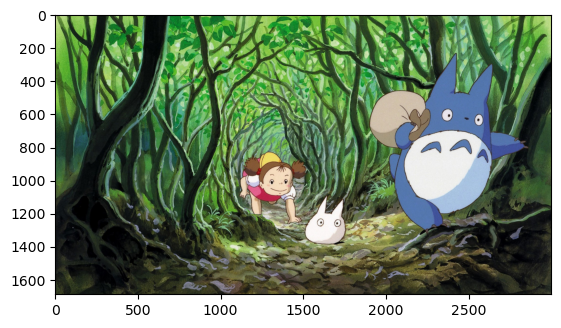

In [28]:
# Showing image used for the excercise
plt.imshow(totoro)
plt.show()

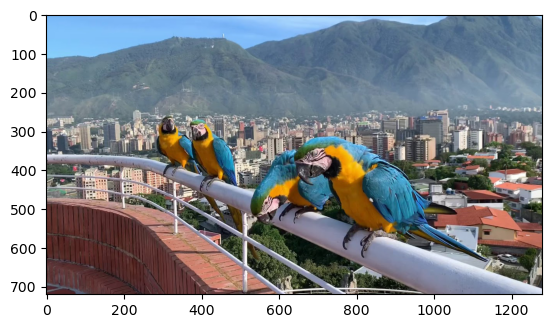

In [82]:
# Showing image used for the excercise
plt.imshow(ccs)
plt.show()

**Writing energy_image()**

The energy function is given by:

$$
e_{1}(I) = |\frac{\delta}{\delta x}I| + |\frac{\delta}{\delta x}|
$$

The image above has three channels. Thereby we need to build a derivative filter that will sweep each channel. For the derivative in each direction I will use the Scharr operator, which is more accurate than the Sobel operator.

In [37]:
# 2D version of the Scharr operator

filter_dy = np.array([
    [47.0, 162.0, 47.0],
    [0.0, 0.0, 0.0],
    [-47.0, -162.0, -47.0],
])

# This converts it from a 2D filter to a 3D filter, replicating the same filter for each channel: R, G, B
filter_dy = np.stack((filter_dy,filter_dy,filter_dy), axis=2)

filter_dy

array([[[  47.,   47.,   47.],
        [ 162.,  162.,  162.],
        [  47.,   47.,   47.]],

       [[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[ -47.,  -47.,  -47.],
        [-162., -162., -162.],
        [ -47.,  -47.,  -47.]]])

In [39]:
filter_dy[:,:,0]

array([[  47.,  162.,   47.],
       [   0.,    0.,    0.],
       [ -47., -162.,  -47.]])

In [40]:
# 2D version of the Scharr operator

filter_dx = np.array([
    [47.0, 0.0, -47.0],
    [162.0, 0.0, -162.0],
    [47.0, 0.0, -47.0],
])

# This converts it from a 2D filter to a 3D filter, replicating the same filter for each channel: R, G, B
filter_dx = np.stack((filter_dx,filter_dx,filter_dx), axis=2)

filter_dx

array([[[  47.,   47.,   47.],
        [   0.,    0.,    0.],
        [ -47.,  -47.,  -47.]],

       [[ 162.,  162.,  162.],
        [   0.,    0.,    0.],
        [-162., -162., -162.]],

       [[  47.,   47.,   47.],
        [   0.,    0.,    0.],
        [ -47.,  -47.,  -47.]]])

In [43]:
filter_dx[:,:,2]

array([[  47.,    0.,  -47.],
       [ 162.,    0., -162.],
       [  47.,    0.,  -47.]])

To convolve the image I am using a scypy function: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html

In [57]:
img = totoro.astype(np.double)
img.dtype

dtype('float64')

In [58]:
convolved_img = np.absolute(convolve(img, filter_dx)) + np.absolute(convolve(img, filter_dy))

# We sum the energies in the red, green, and blue channels
energy_map = convolved_img.sum(axis=2)

In [65]:
totoro.shape

(1688, 3000, 3)

In [60]:
energy_map.shape

(1688, 3000)

In [61]:
# Checking the output type meets HW's requirement
energy_map.dtype

dtype('float64')

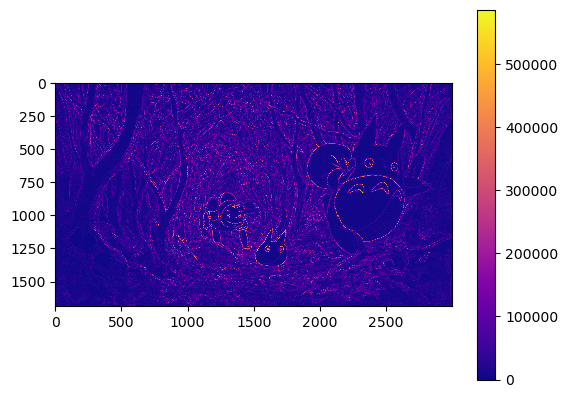

In [62]:
plt.imshow(energy_map, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.show()

In [74]:
input_type = np.dtype(np.uint8)
output_type = np.dtype(np.double)

def energy_image(im: npt.NDArray[np.uint8]) -> npt.NDArray[np.double]:
    """
    Input Arguments: 
        An image with dimmensions MxNx3 of data type uint8
    
    Output: 
        The result of passing the image to the energy function e_1(im) = |d(im)/dx| + |d(im)/dy|
        The partial derivatives operators use the optimal 8 bit integer valued 3x3 filter 
        stemming from Scharr's theory
    """
    assert im.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert im.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'
    
    ### Creating Partial Derivative Operators ###
    
    # 2D version of the Scharr operator
    filter_dy = np.array([
        [47.0, 162.0, 47.0],
        [0.0, 0.0, 0.0],
        [-47.0, -162.0, -47.0],
    ])

    # This converts it from a 2D filter to a 3D filter, replicating the same filter for each channel: R, G, B
    filter_dy = np.stack((filter_dy,filter_dy,filter_dy), axis=2)
    
    # 2D version of the Scharr operator
    filter_dx = np.array([
        [47.0, 0.0, -47.0],
        [162.0, 0.0, -162.0],
        [47.0, 0.0, -47.0],
    ])

    # This converts it from a 2D filter to a 3D filter, replicating the same filter for each channel: R, G, B
    filter_dx = np.stack((filter_dx,filter_dx,filter_dx), axis=2)

    ### Converting input into desired output data type ###
    img = im.astype(np.double)
    
    # Convolving the image to get the gradient on each channel
    convolved_img = np.absolute(convolve(img, filter_dx)) + np.absolute(convolve(img, filter_dy))

    # Adding the energies in the red, green, and blue channels
    energy_map = convolved_img.sum(axis=2)
    
    return energy_map

In [75]:
test_energy_map = energy_image(totoro)

In [77]:
test_energy_map

array([[ 2304., 26802., 14436., ..., 10188., 15308.,  8960.],
       [  846., 22428., 14436., ...,  8730., 13286., 11364.],
       [ 4608., 12132.,  7854., ...,  8370.,  8526.,  7680.],
       ...,
       [12978., 15282., 13824., ..., 35784., 35784., 22428.],
       [17586., 14436., 10062., ..., 10296., 10908., 23652.],
       [10674., 11286.,  1458., ...,  8370.,  9828.,  7524.]])

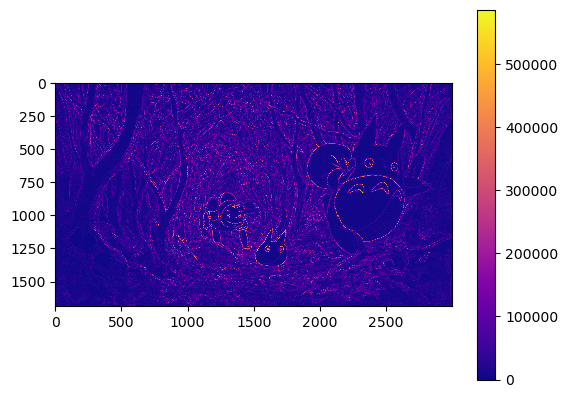

In [76]:
plt.imshow(test_energy_map, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.show()

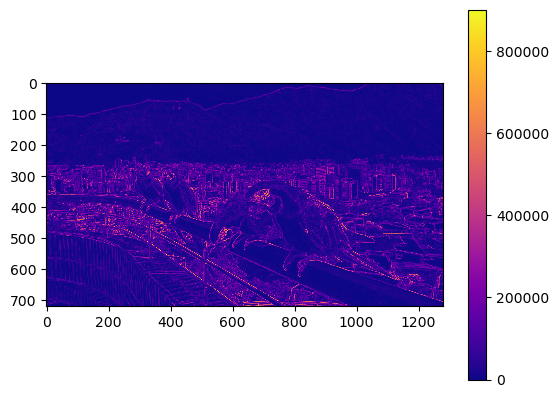

In [83]:
test_energy_map_2 = energy_image(ccs)
plt.imshow(test_energy_map_2, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.show()

**Writing cumulative_minimum_energy_map()**

Using dynamic programming for generating a vertical seam the first step is to traverse the image from the second row to the last row and compute the cumulative minimum energy M for all possible connected seams for each pizel (i,j):

$$
M(i,j) = e(i,j) + min[M(i-1,j-1), M(i-1,j), M(i+1,j+1)]
$$

In [84]:
cumulative_energy_map = np.zeros_like(test_energy_map)

In [85]:
test_energy_map.shape

(1688, 3000)

In [86]:
cumulative_energy_map.shape

(1688, 3000)

In [87]:
row_size = test_energy_map.shape[0]
cols_size = test_energy_map.shape[1]